In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import os
from scipy.signal import savgol_filter

In [20]:
data_all = np.loadtxt('exp_results/PV_4folds_R10_new.csv', skiprows = 2, delimiter = ',', usecols = tuple(range(6)))
vol_all = data_all[:,0]
pressure_all = np.mean(data_all[:,1:], axis = 1)


#note: checked and this is averaged correctly w/o any extra volume stuff

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_all[0]

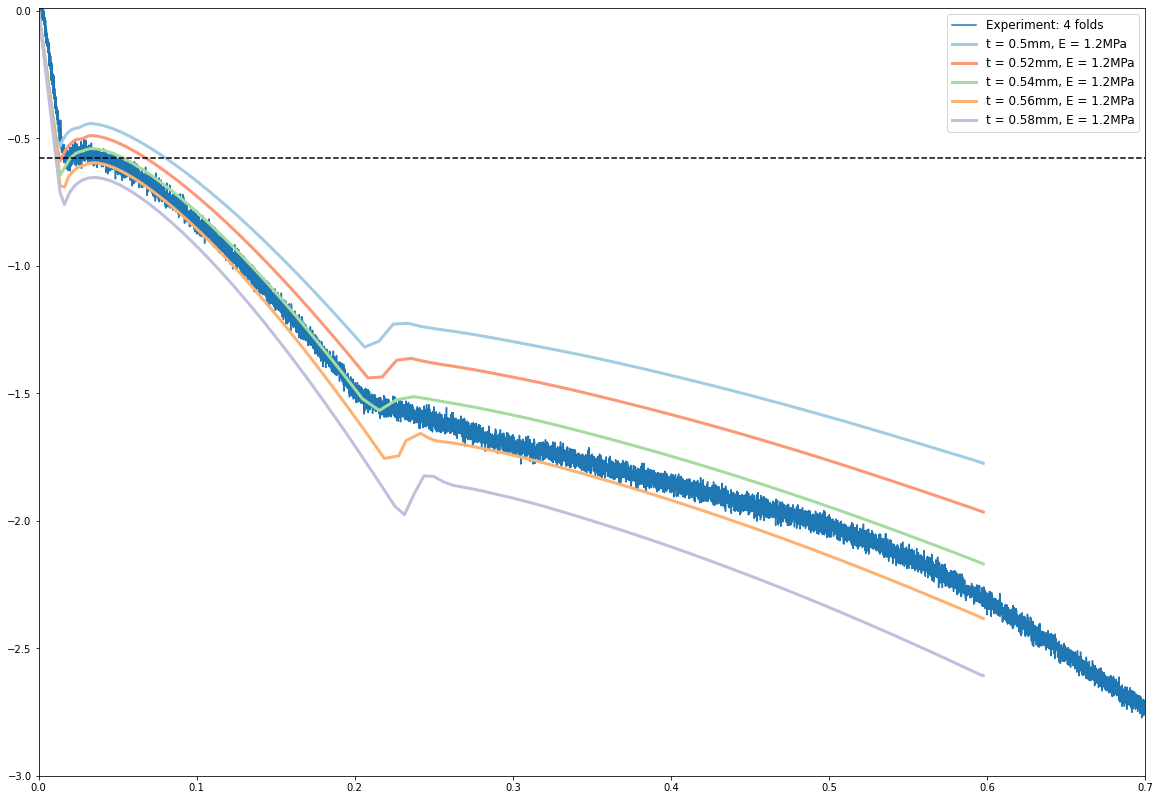

In [42]:
E_try = [1.1, 1.2, 1.3, 1.4]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (16,11), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 550
p_cr = 0.579


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if E == 1.2:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            #j/(len(t_try) - 1)*0.85+0.15
            color_plot = plt.get_cmap(cmap_all[i])((j/(len(t_try) - 1))*0.85 + 0.15)
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)

ax.hlines(-p_cr, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

fig.savefig('scream yi/4folds_fitting.png', facecolor = 'white')

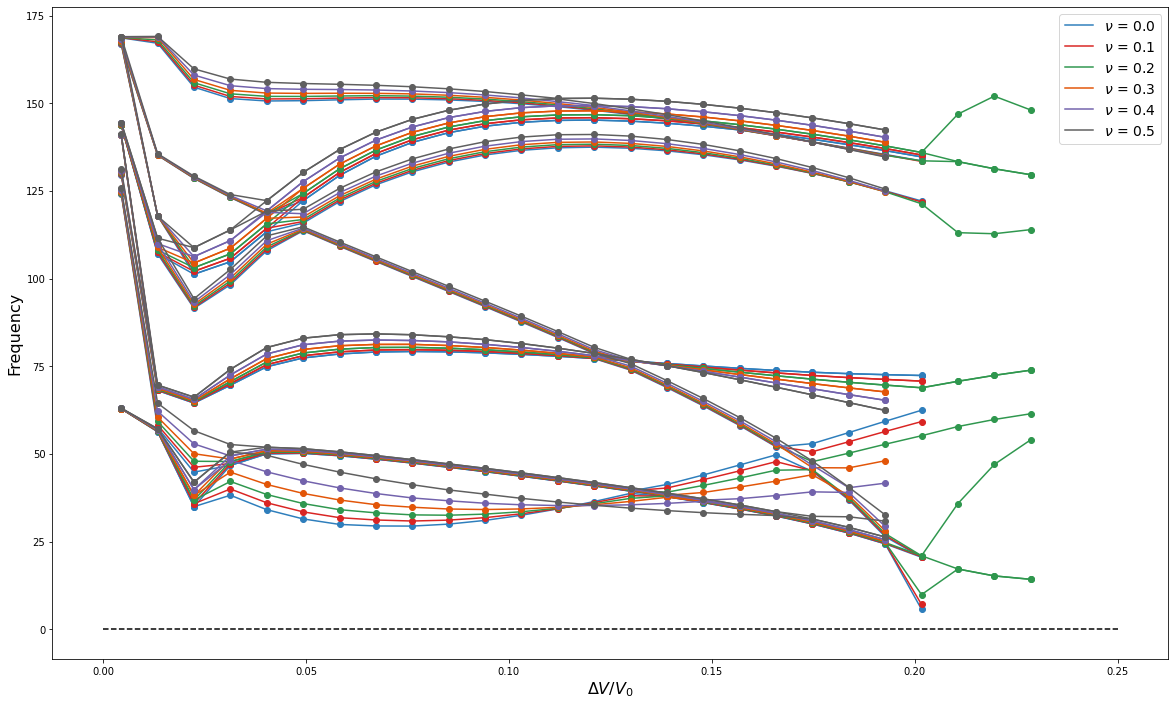

In [46]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 900

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.hlines(0,0,0.25,'k','--')


fig.savefig('data_processed/change_nu_4folds_freq.jpg')


(-3.0, 0.01)

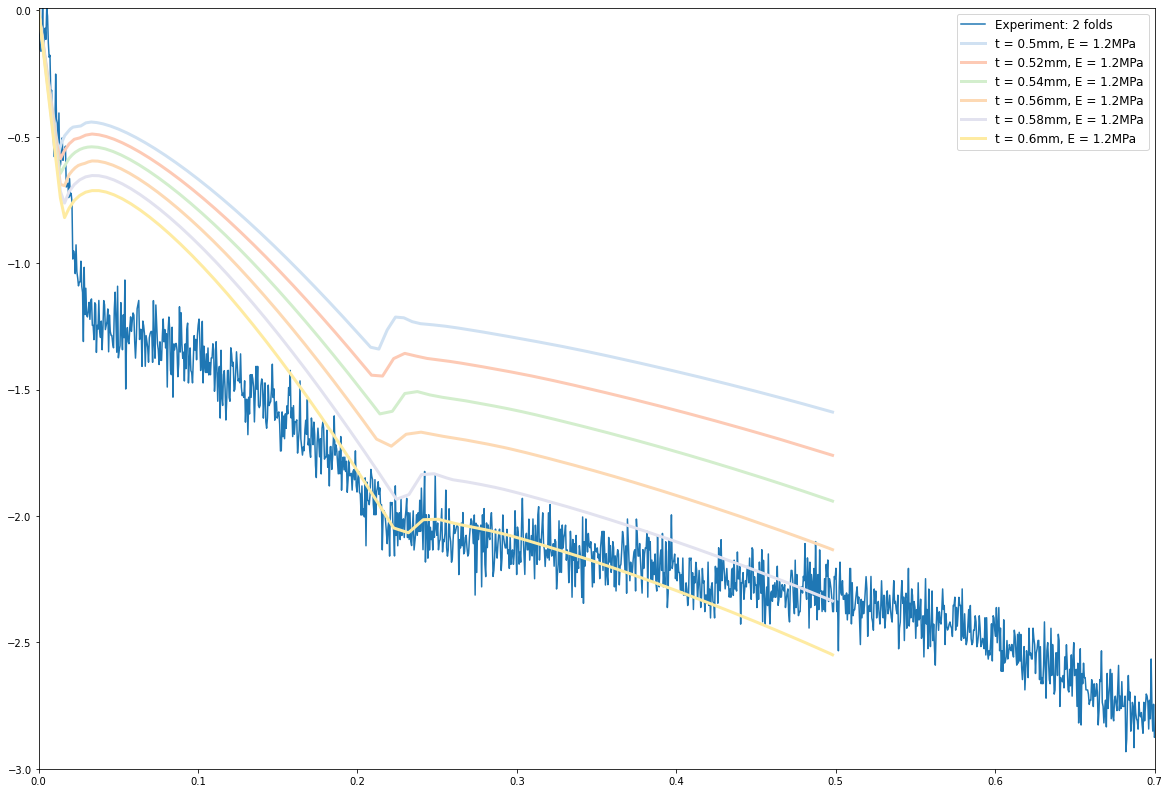

In [7]:
E_try = [1.1, 1.2, 1.3, 1.4]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58, 0.6]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 500


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if E == 1.2:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

(-4.5, 0.01)

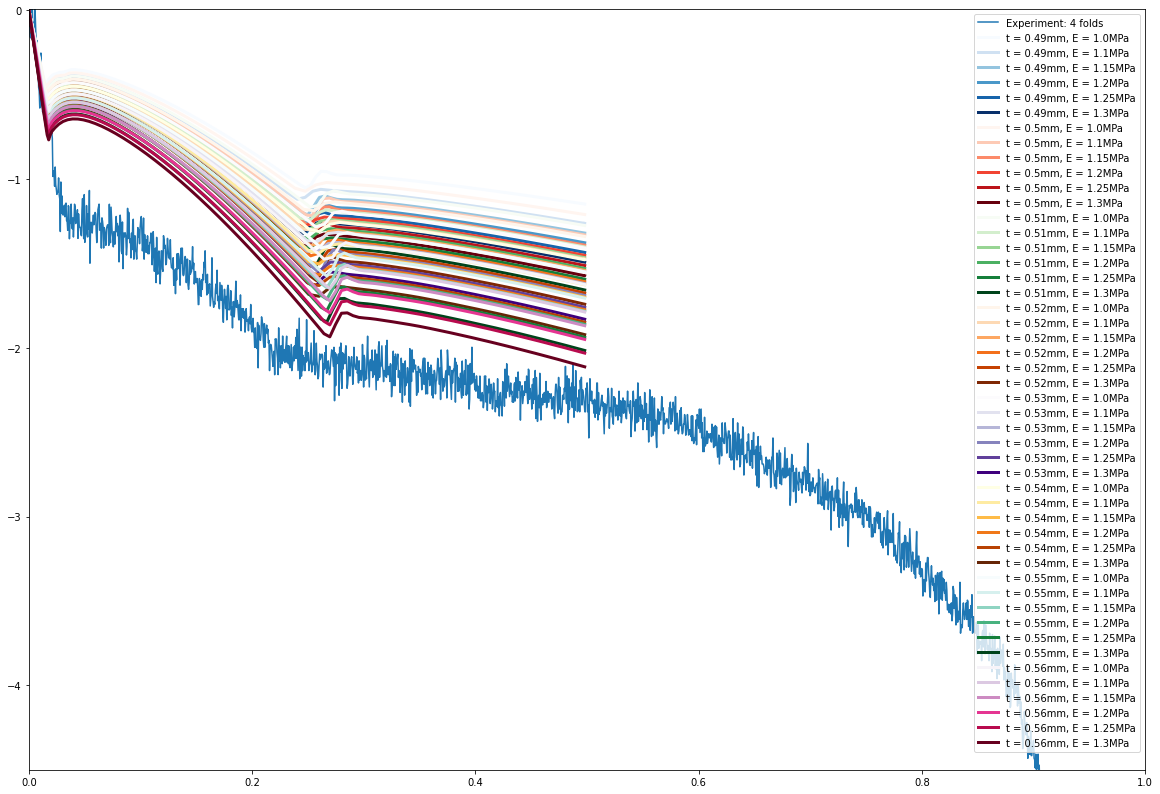

In [3]:
E_try = [1.0, 1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(E_try) - 1))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 1)
ax.set_ylim(top = 0.01, bottom = -4.5)

(-3.0, 0.01)

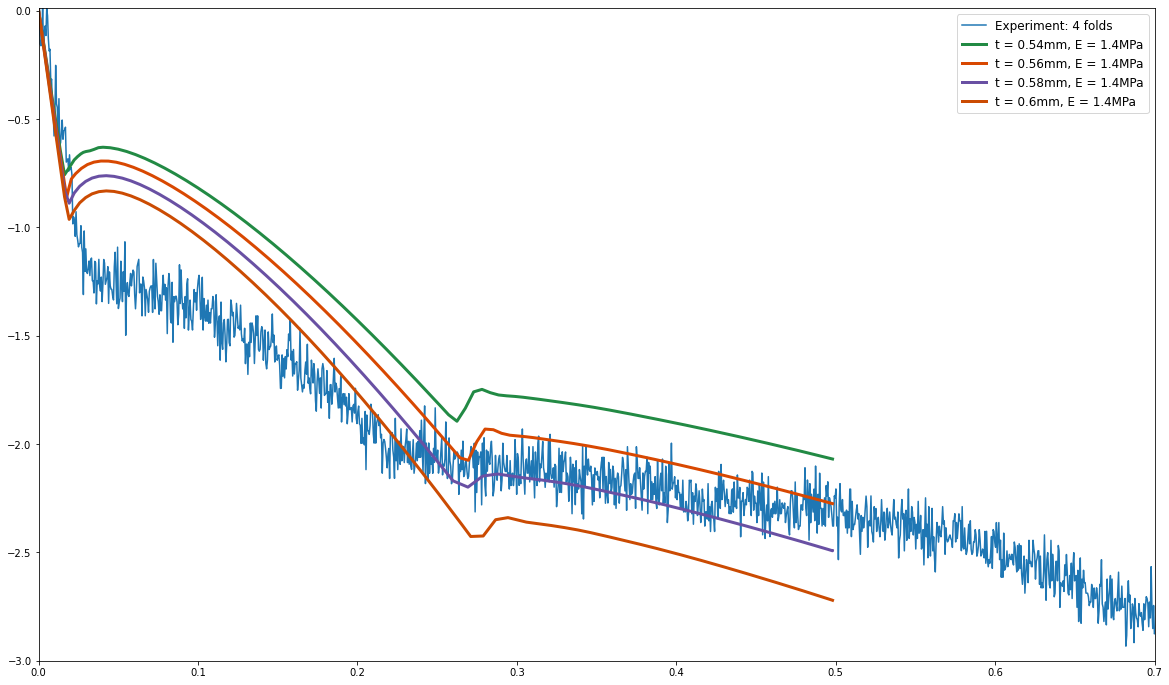

In [4]:
E_try = [1.1, 1.2, 1.3, 1.4, 1.5]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58, 0.6]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 200


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if t > 0.53 and E == 1.4:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(E_try) - 1))
            # print(j/(len(E_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

(-3.0, 0.01)

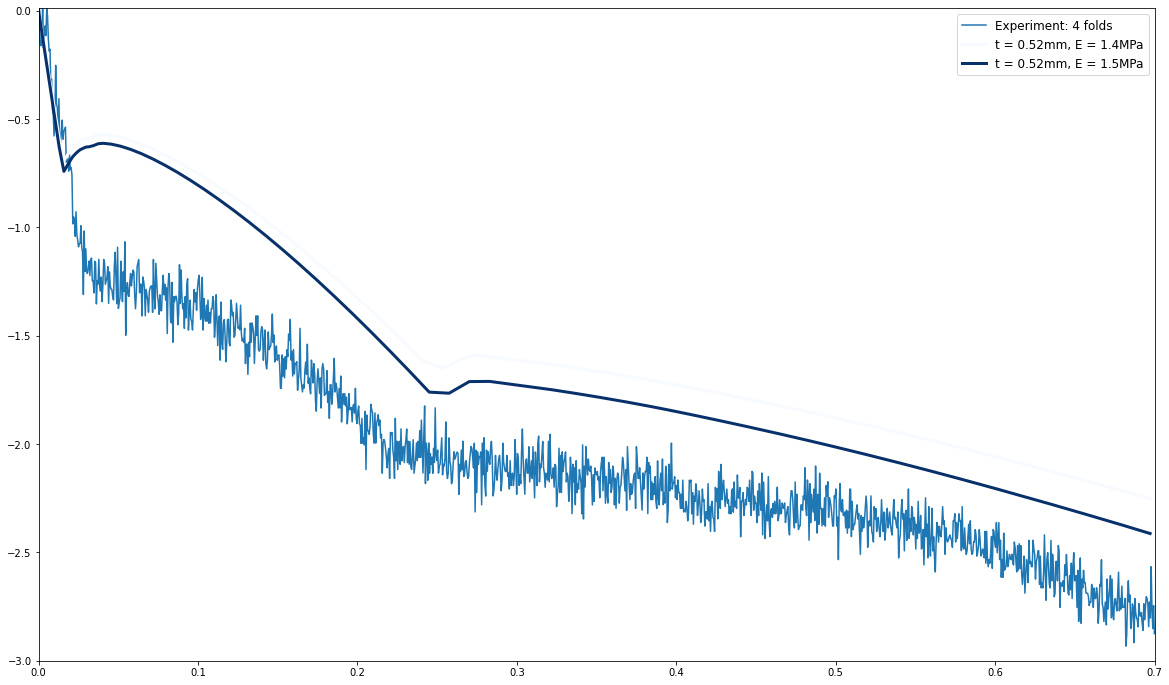

In [5]:
E_try = [1.4, 1.5]
t_try = [0.52]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 300


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        try:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(E_try) - 1))
            # print(j/(len(E_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)
        except: pass

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

(-3.0, 0.01)

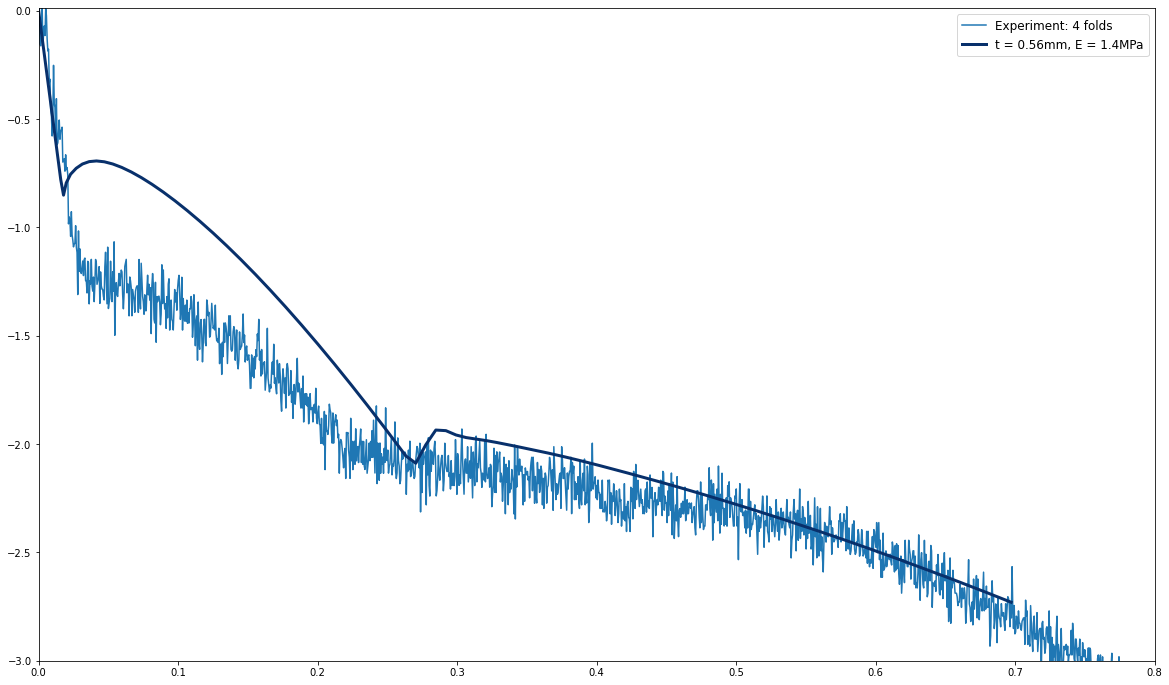

In [6]:
E_try = [1.4]
t_try = [0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 400


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.8)
ax.set_ylim(top = 0.01, bottom = -3)

(-3.0, 0.01)

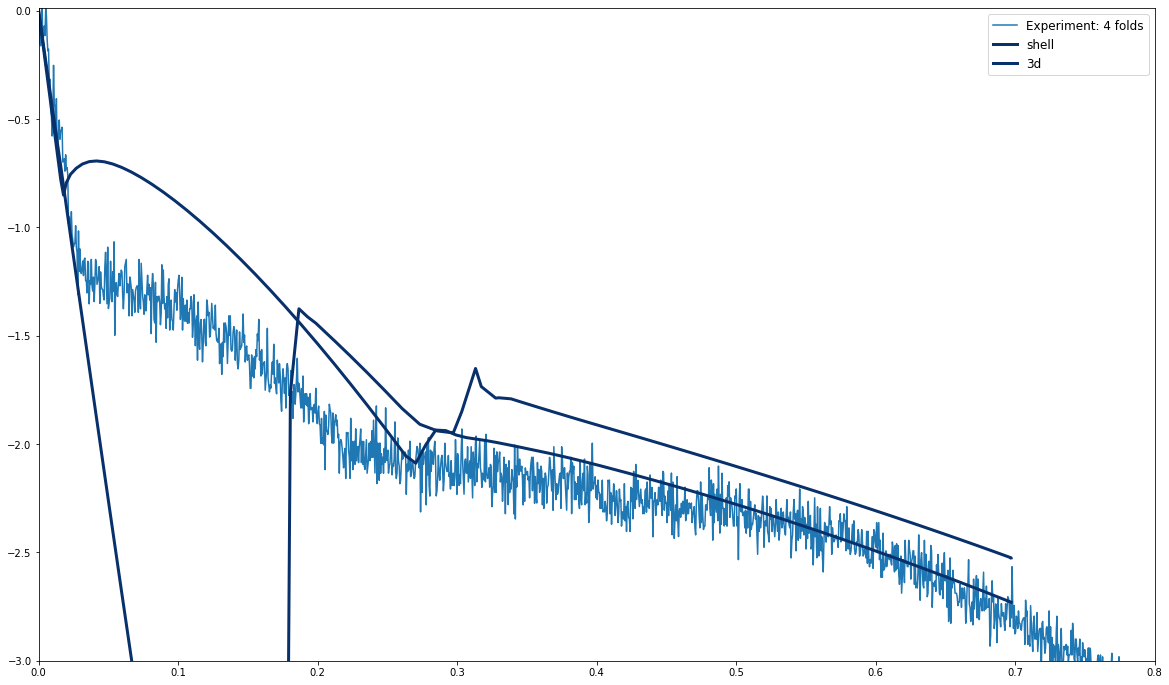

In [16]:
E_try = [1.4]
t_try = [0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 400


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f'shell', color = color_plot,
            linewidth = 3)

idx_cur = 100
data_cur = np.loadtxt(f'data_out/4fold-test_3d-v{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f'3d', color = color_plot,
    linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.8)
ax.set_ylim(top = 0.01, bottom = -3)

(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)
(0.8871510957324106, 0.3320876585928489, 0.03104959630911188, 1.0)
(0.4488427527873895, 0.3839600153787005, 0.6738792772010764, 1.0)
(0.8482276047673972, 0.3522952710495963, 0.03497116493656286, 1.0)


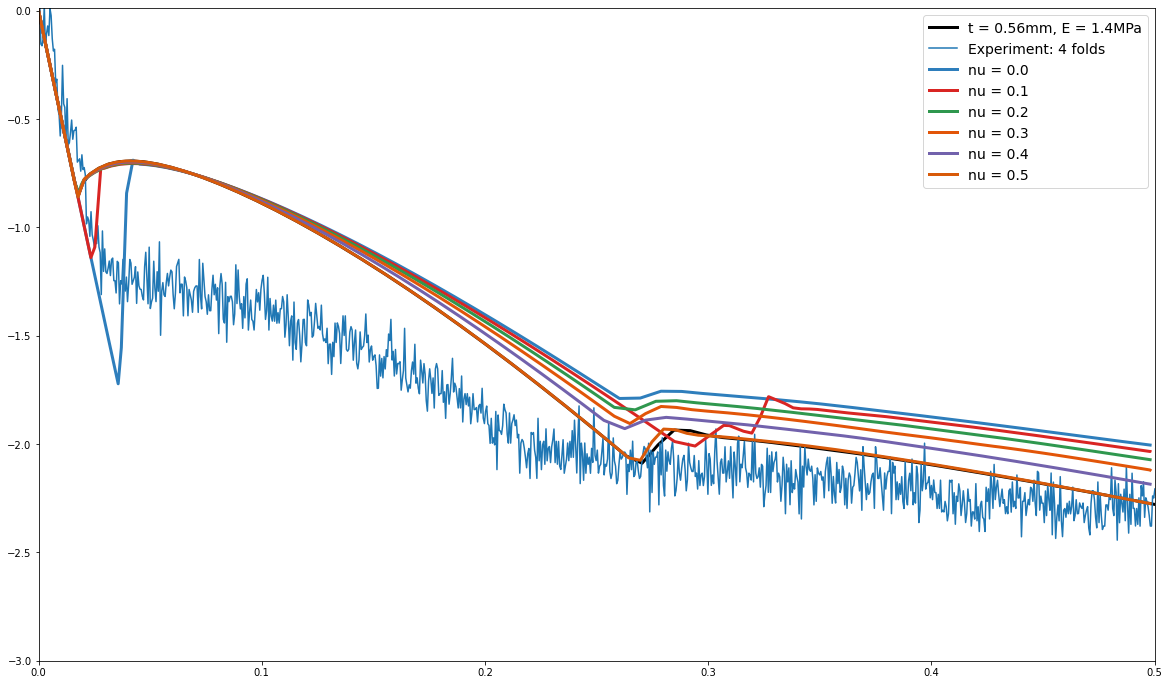

In [7]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100

data_cur = np.loadtxt(f'data_out/4fold-fitting-400_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f't = {0.56}mm, E = {1.4}MPa', color = 'k',linewidth = 3)


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,nu in enumerate(nu_try):
    try:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(0.7)
        print(color_plot)
        ax.plot(vol_norm,pressure_kpa, label = f'nu = {nu}', color = color_plot,
            linewidth = 3)
    except: pass


ax.legend(loc = 'best', fontsize = 14)
ax.set_xlim(left = 0, right = 0.5)
ax.set_ylim(top = 0.01, bottom = -3)


fig.savefig('data_processed/change_nu_4folds.png')

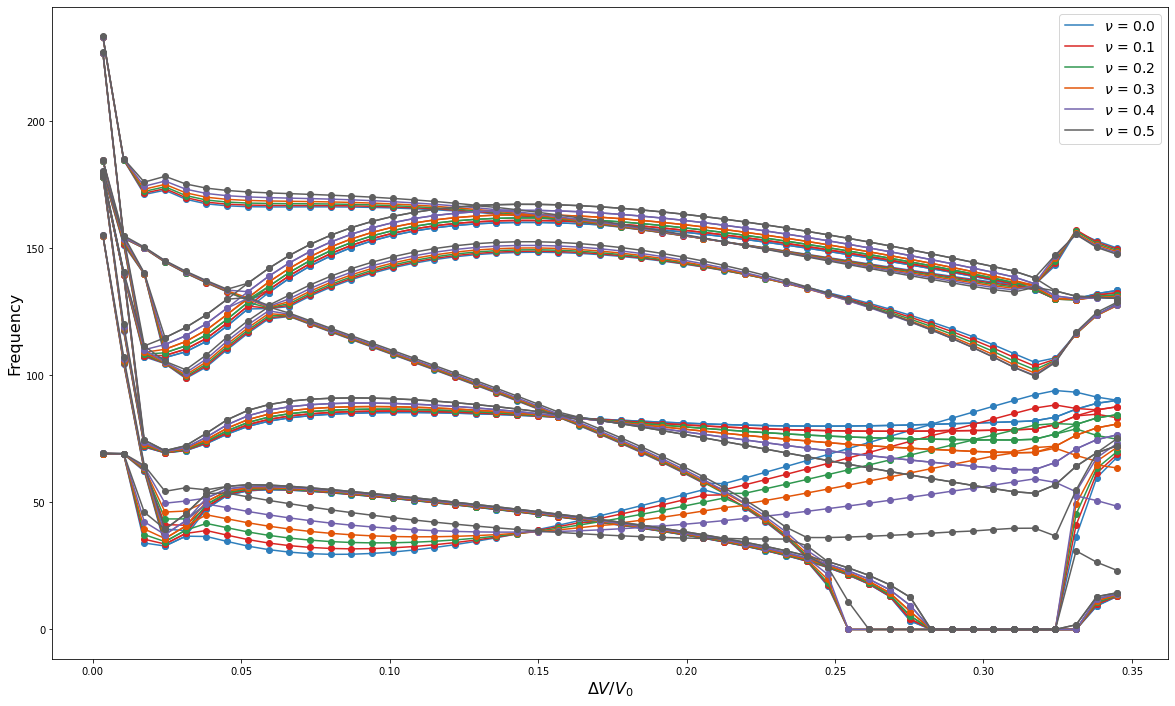

In [6]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 260

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


fig.savefig('data_processed/change_nu_4folds_freq.jpg')


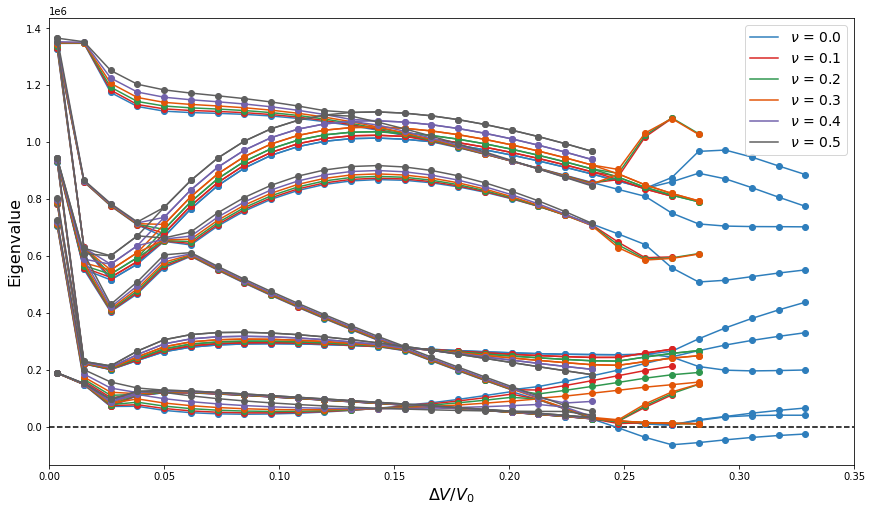

In [28]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 240

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--')

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Eigenvalue', fontsize = 16)
ax.set_xlim(0,0.35)


fig.savefig('data_processed/change_nu_4folds_val.jpg')


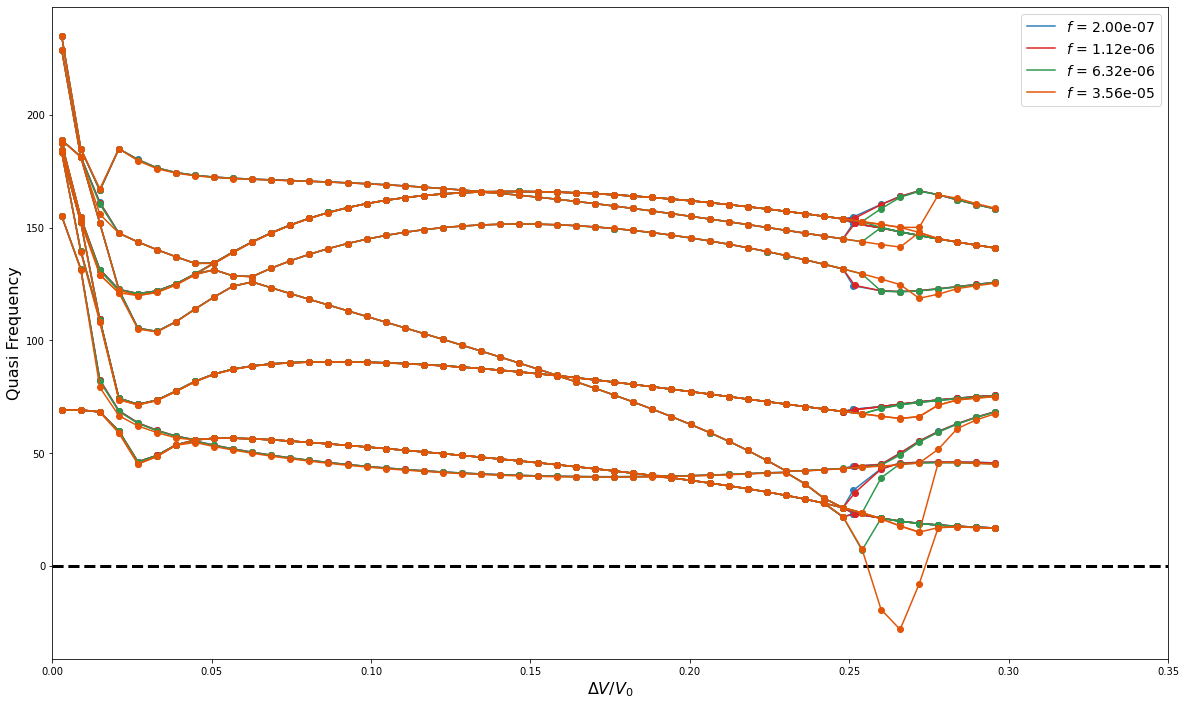

In [14]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 320

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 4:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.35)


fig.savefig('data_processed/static_stable_4folds.jpg')


(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)


(-1.5, -1.2)

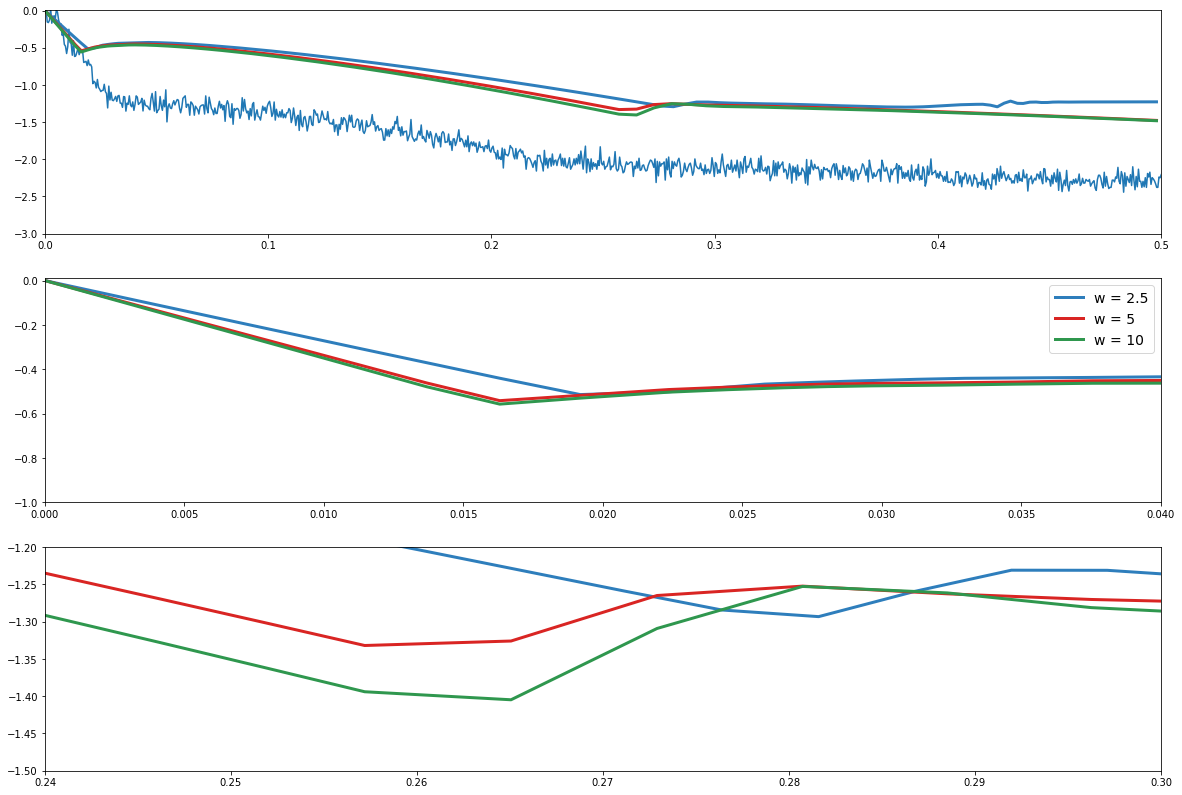

In [64]:
w_try = [2.5, 5, 10]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(3,1,figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100


ax[0].plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,w in enumerate(w_try):
    idx_cur = initial_idx + i
    data_path = f'data_out/4fold-test_w-{idx_cur}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap(cmap_all[i])(0.7)
    print(color_plot)
    for j in range(3):
        ax[j].plot(vol_norm,pressure_kpa, label = f'w = {w}', color = color_plot,
            linewidth = 3)


ax[1].legend(loc = 'best', fontsize = 14)
ax[0].set_xlim(left = 0, right = 0.5)
ax[0].set_ylim(top = 0.01, bottom = -3)

ax[1].set_xlim(left = 0, right = 0.04)
ax[1].set_ylim(top = 0.01, bottom = -1)

ax[2].set_xlim(left = 0.24, right = 0.3)
ax[2].set_ylim(top = -1.2, bottom = -1.5)

# fig.savefig('data_processed/imper_4folds.png')

(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)
(0.8871510957324106, 0.3320876585928489, 0.03104959630911188, 1.0)
(0.4488427527873895, 0.3839600153787005, 0.6738792772010764, 1.0)


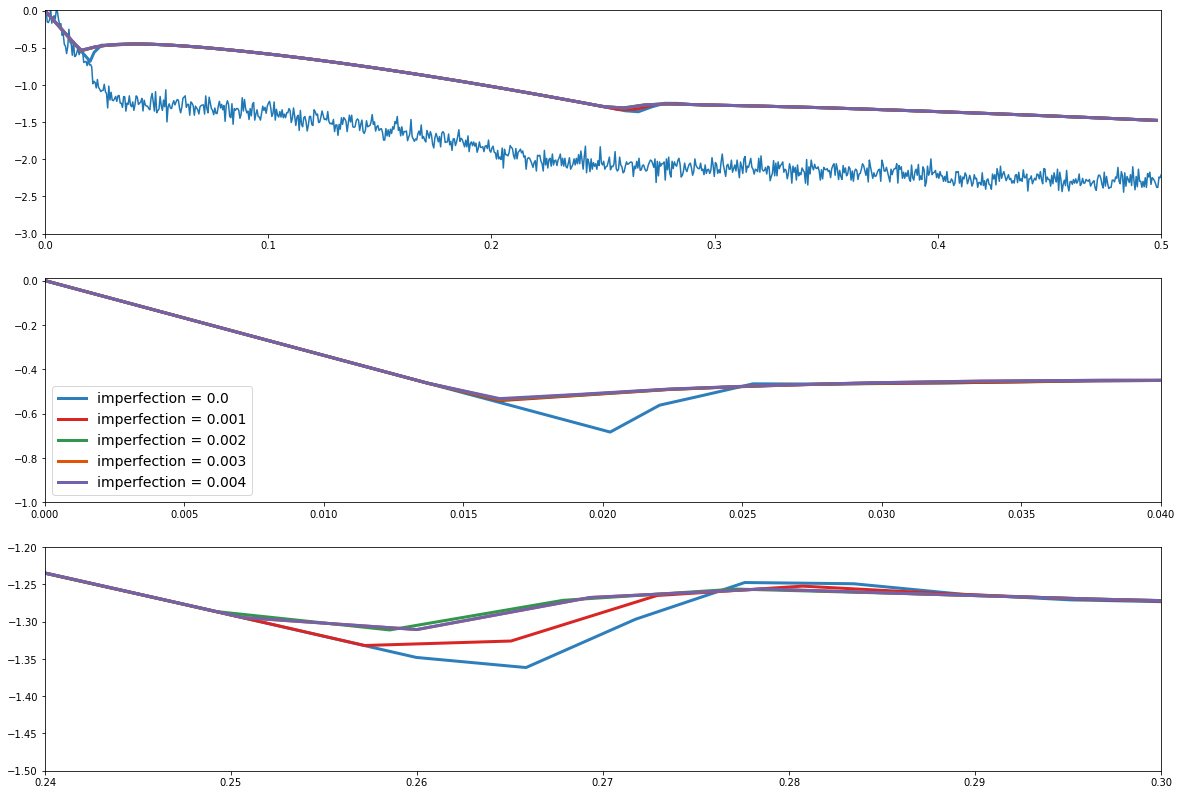

In [55]:
imperfection_test = [0.0, 0.001, 0.002, 0.003, 0.004]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(3,1,figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100


ax[0].plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,imper in enumerate(imperfection_test):
    idx_cur = initial_idx + i
    data_path = f'data_out/imper-test-4fold-v{idx_cur}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap(cmap_all[i])(0.7)
    print(color_plot)
    for j in range(3):
        ax[j].plot(vol_norm,pressure_kpa, label = f'imperfection = {imper}', color = color_plot,
            linewidth = 3)


ax[1].legend(loc = 'best', fontsize = 14)
ax[0].set_xlim(left = 0, right = 0.5)
ax[0].set_ylim(top = 0.01, bottom = -3)

ax[1].set_xlim(left = 0, right = 0.04)
ax[1].set_ylim(top = 0.01, bottom = -1)

ax[2].set_xlim(left = 0.24, right = 0.3)
ax[2].set_ylim(top = -1.2, bottom = -1.5)

fig.savefig('data_processed/imper_4folds.png')

In [36]:
plt.get_cmap(cmap_all[i])(0.5)

(0.617762399077278, 0.6021376393694733, 0.7834525182622069, 1.0)